**Predicting Stress and Depression Levels Using Smartphone Usage Patterns**

---




This project analyzes how smartphone usage patterns relate to mental well-being. Data was collected through an online form, including daily phone activity, sleep habits, academic performance, and self-reported stress and depression. After cleaning the dataset and performing EDA, three machine learning models (Logistic Regression, Decision Tree, Random Forest) were applied to predict Stress_Level and Depression_Level.

The models provided the clearest insights through feature importance, showing that conversation duration, online activity, sleep quality, and academic performance are key indicators of mental health. The results highlight the potential of using smartphone behavioral data to support early detection of stress and depression.

In [45]:
# Upload the file to Google Colab
from google.colab import files
uploaded = files.upload()

Saving processed_data.csv to processed_data.csv


**Exploratory Data Analysis (EDA)**

An exploratory data analysis (EDA) was performed to understand the structure and characteristics of the dataset.

In [47]:
# Download libraries + Download data
import pandas as pd
import numpy as np

df = pd.read_csv("processed_data.csv")
print("Loaded:", df.shape)
df.head()

Loaded: (403, 40)


,SMS,Call duration,Conversation duration,Total deadlines,Cumulative GPA,Spring GPA,CS65 GPA,Sleep Time,Sleep Rating,Times Drowsy,...,Questions,Notes,Answers,Total comments,Comments positivity,Stress Level,Depression Frequency,Phone Affects Sleep (New),Studying Distraction (New),Cluster
0,24.0,22.50,229.60,1.0,3.68,3.78,4.00000,0.00,0.0,0.00,...,0,0,0,0,0.023,2.25,0.0,0.0,1.0,0
1,23.6,0.38,313.92,1.0,3.50,3.78,3.55753,7.20,3.0,0.00,...,4,0,0,0,0.027,3.00,0.0,0.0,1.0,2
2,23.8,22.50,304.71,0.0,3.68,3.78,4.00000,0.00,0.0,0.00,...,0,0,0,0,0.023,2.25,0.0,0.0,1.0,0
3,24.0,22.50,253.37,1.0,3.67,3.78,4.00000,8.00,3.0,0.67,...,11,0,3,0,0.023,2.17,0.0,0.0,1.0,2
4,45.0,3.17,182.34,5.0,3.62,3.78,4.00000,5.75,3.0,1.25,...,3,1,1,1,0.029,3.33,0.0,0.0,1.0,2


In [48]:
# General information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SMS                           403 non-null    float64
 1   Call duration                 403 non-null    float64
 2   Conversation duration         403 non-null    float64
 3   Total deadlines               403 non-null    float64
 4   Cumulative GPA                403 non-null    float64
 5   Spring GPA                    403 non-null    float64
 6   CS65 GPA                      403 non-null    float64
 7   Sleep Time                    403 non-null    float64
 8   Sleep Rating                  403 non-null    float64
 9   Times Drowsy                  403 non-null    float64
 10  Academic                      403 non-null    int64  
 11  Books                         403 non-null    int64  
 12  Dating                        403 non-null    int64  
 13  Games

In [49]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SMS,403.0,26.274938,24.679470,0.000000,19.600000,24.00000,35.000000,343.600000
Call duration,403.0,22.437692,25.114925,0.000000,22.500000,22.50000,22.500000,477.270000
Conversation duration,403.0,151.846923,146.250760,0.000000,45.000000,75.00000,229.010000,630.920000
Total deadlines,403.0,1.523573,2.129236,0.000000,1.000000,1.00000,1.000000,9.000000
Cumulative GPA,403.0,3.483747,0.219786,2.400000,3.500000,3.50000,3.500000,3.950000
Spring GPA,403.0,14.636104,29.959369,1.000000,3.780000,3.78000,3.780000,96.000000
CS65 GPA,403.0,3.431902,0.580738,0.000000,3.166292,3.55753,3.825724,4.000000
Sleep Time,403.0,6.122481,2.718816,0.000000,6.500000,6.50000,7.500000,14.000000
Sleep Rating,403.0,2.475471,1.170246,0.000000,2.000000,2.81500,3.000000,4.000000
Times Drowsy,403.0,0.698660,0.797637,0.000000,0.000000,0.33000,1.000000,2.800000


In [50]:
# Missing values
df.isnull().sum()

,0
SMS,0
Call duration,0
Conversation duration,0
Total deadlines,0
Cumulative GPA,0
Spring GPA,0
CS65 GPA,0
Sleep Time,0
Sleep Rating,0
Times Drowsy,0


In [51]:
# Missing values ​​+ their percentage
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

pd.DataFrame({
    "missing_count": missing_counts,
    "missing_percent": missing_percent
}).sort_values("missing_percent", ascending=False)


,missing_count,missing_percent
SMS,0,0.0
Call duration,0,0.0
Conversation duration,0,0.0
Total deadlines,0,0.0
Cumulative GPA,0,0.0
Spring GPA,0,0.0
CS65 GPA,0,0.0
Sleep Time,0,0.0
Sleep Rating,0,0.0
Times Drowsy,0,0.0


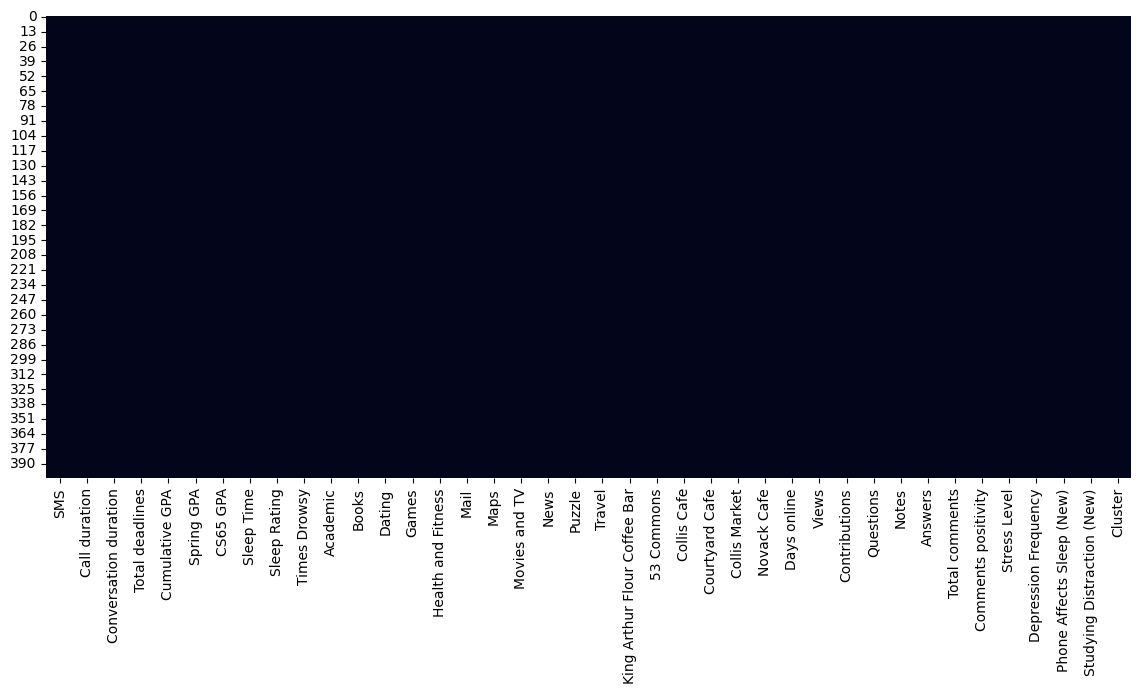

In [52]:
# Heatmap for missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

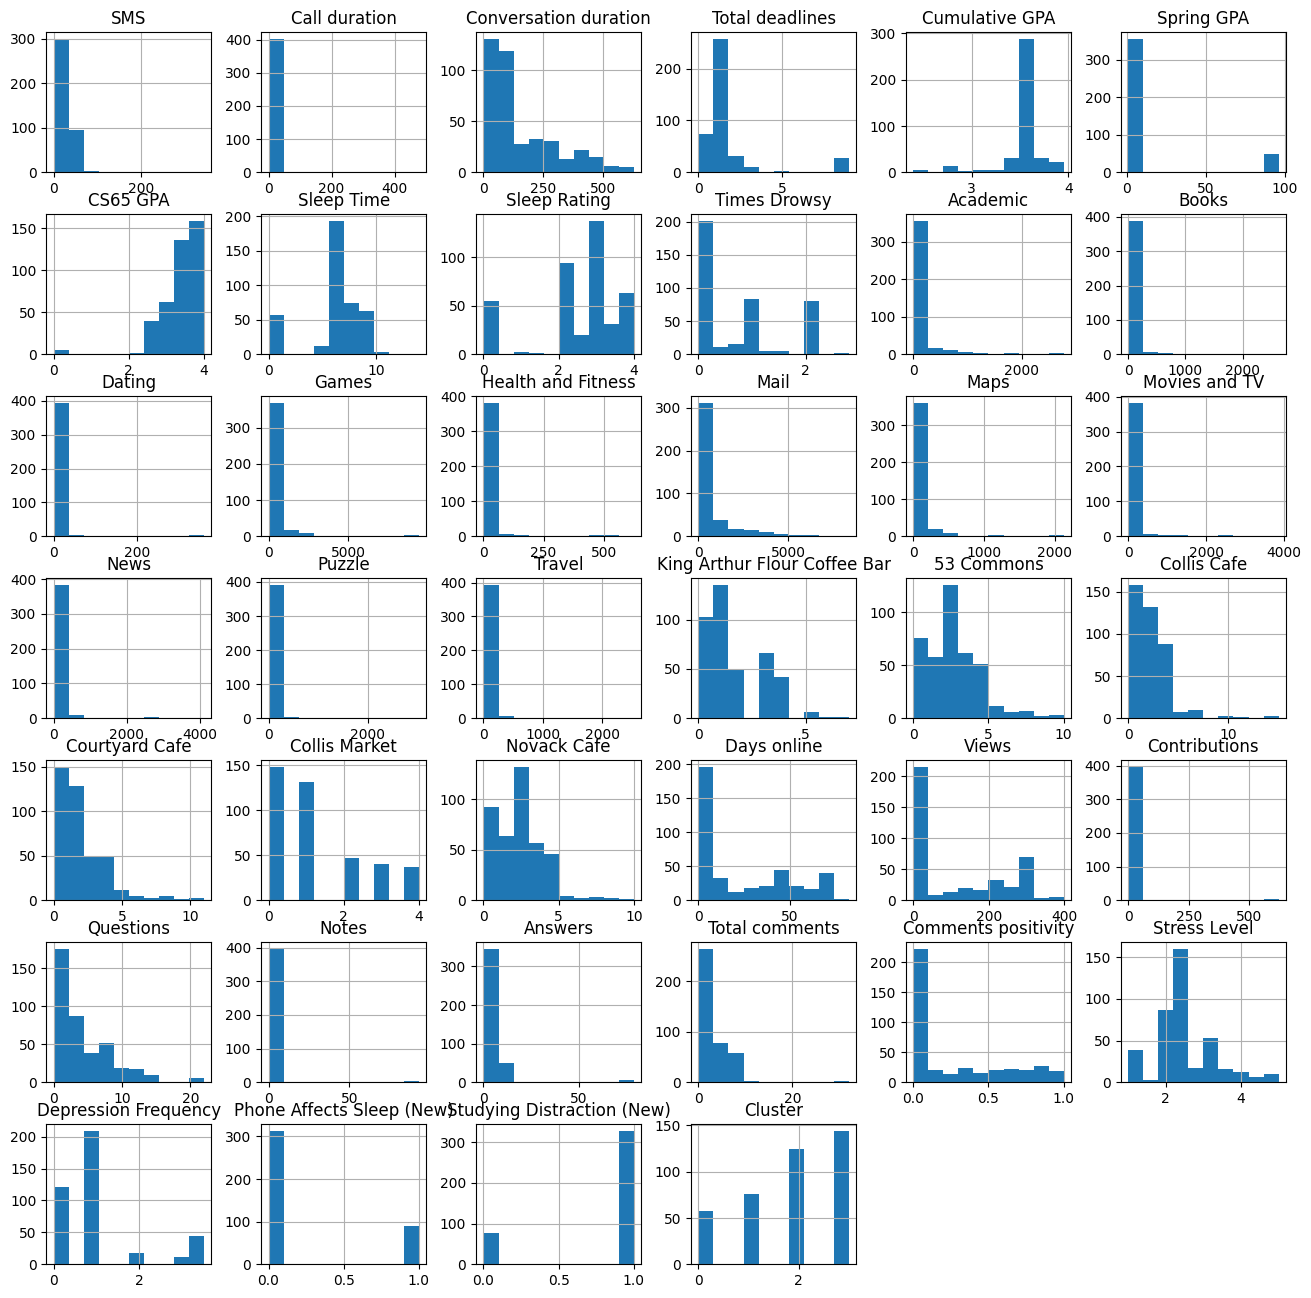

In [53]:
# Histogram for all numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].hist(figsize=(16,16))
plt.show()

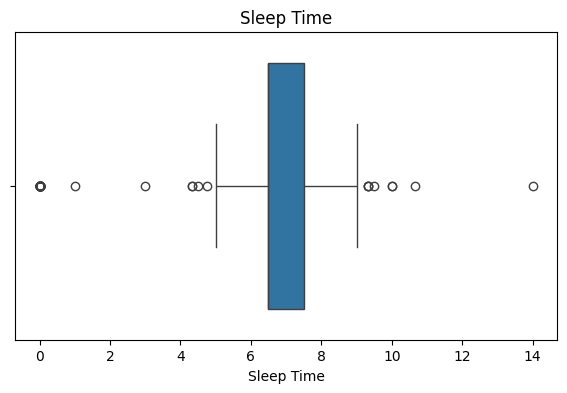

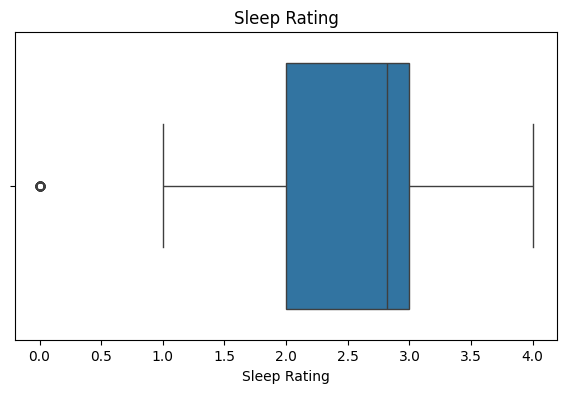

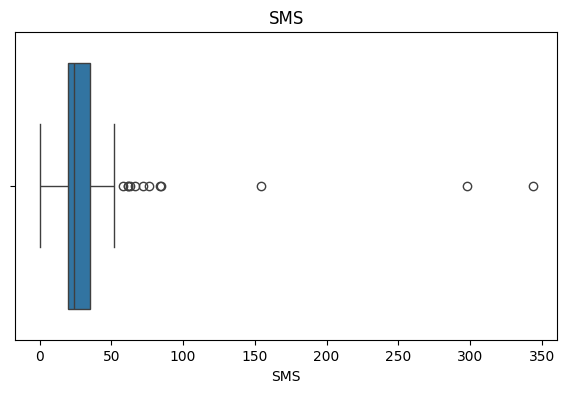

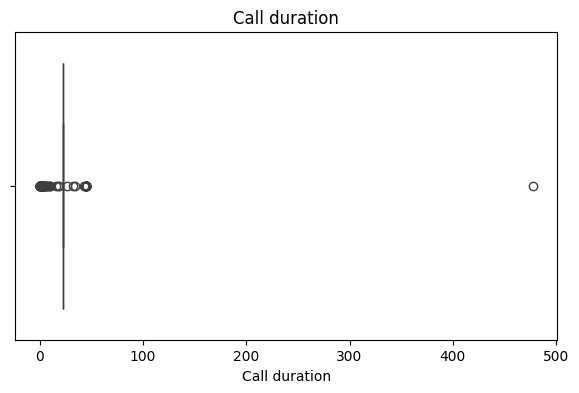

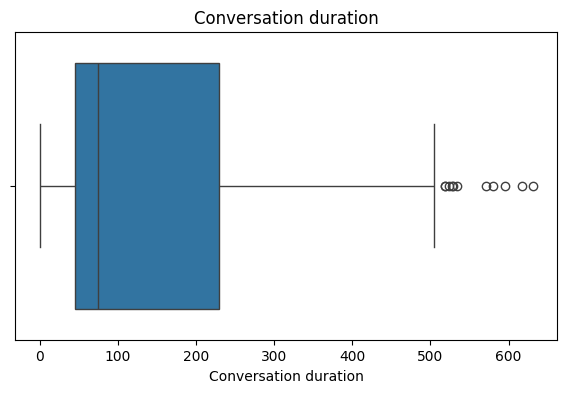

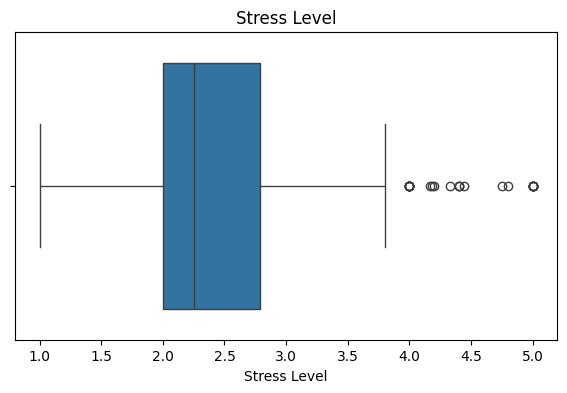

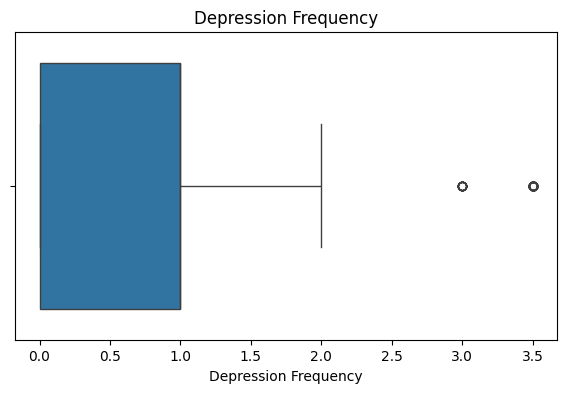

In [54]:
# Boxplots for the most important columns (Sleep - Messages - Calls - Usage)
cols = ["Sleep Time", "Sleep Rating", "SMS",
        "Call duration", "Conversation duration",
        "Stress Level", "Depression Frequency"]

for c in cols:
    if c in df.columns:
        plt.figure(figsize=(7,4))
        sns.boxplot(x=df[c])
        plt.title(c)
        plt.show()

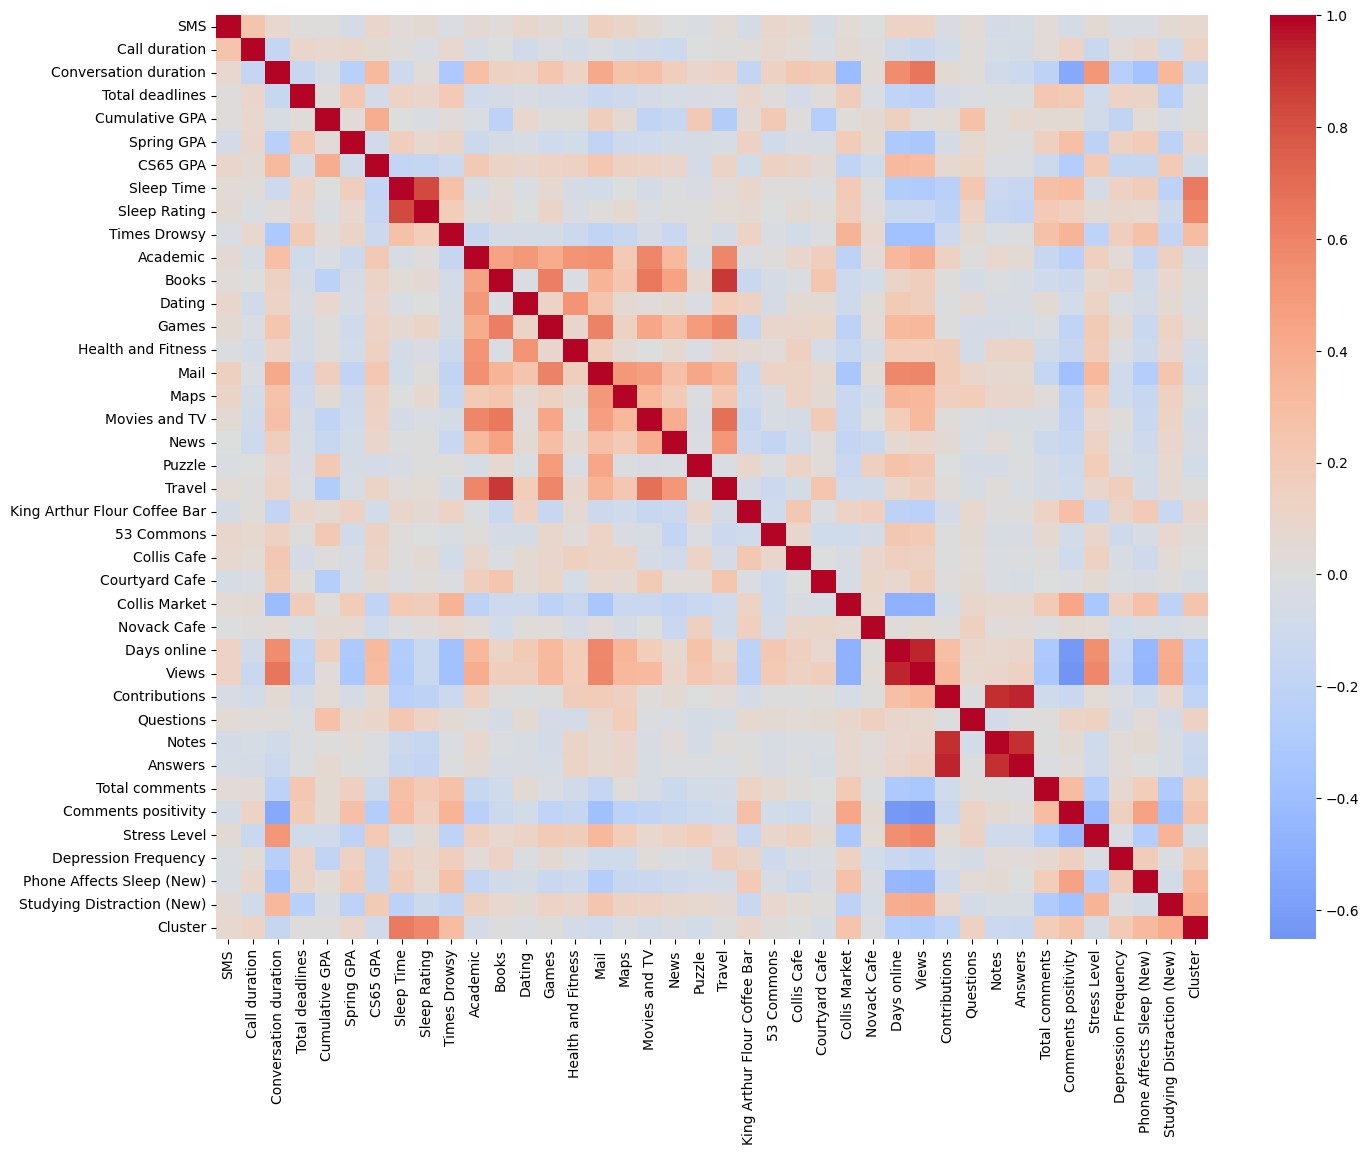

In [55]:
# Correlation Heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.show()

Analyzing the important relationships (Phone × Sleep × Stress × Depression)

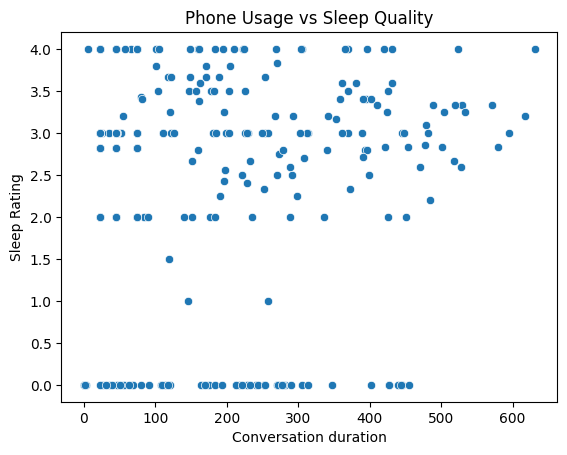

In [56]:
# The relationship between mobile phone usage time and sleep quality
sns.scatterplot(x=df["Conversation duration"], y=df["Sleep Rating"])
plt.title("Phone Usage vs Sleep Quality")
plt.show()

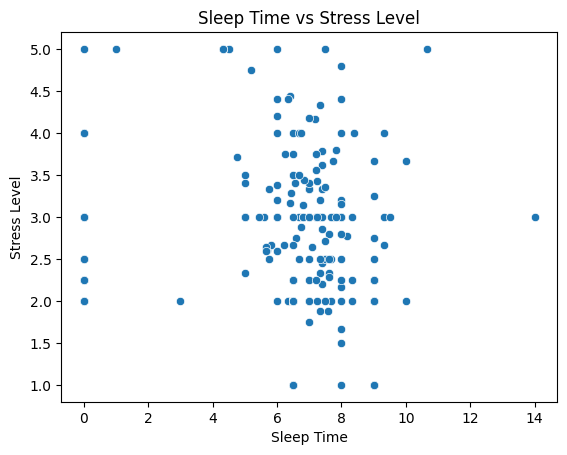

In [57]:
# The relationship between lack of sleep and stress
sns.scatterplot(x=df["Sleep Time"], y=df["Stress Level"])
plt.title("Sleep Time vs Stress Level")
plt.show()

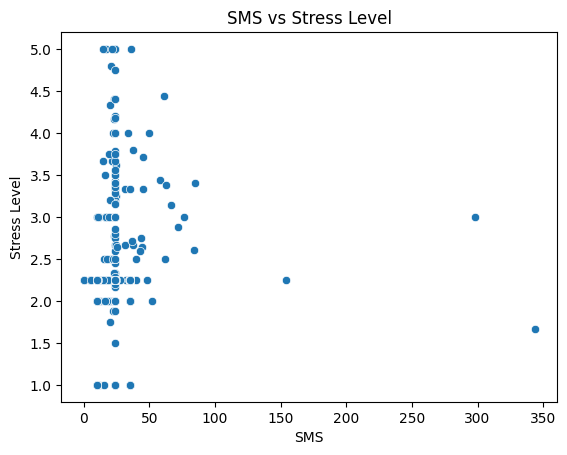

In [58]:
# The relationship between mobile phone use and stress
sns.scatterplot(x=df["SMS"], y=df["Stress Level"])
plt.title("SMS vs Stress Level")
plt.show()

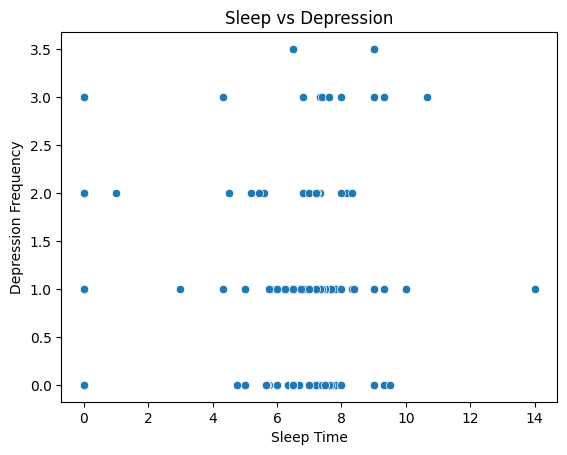

In [59]:
# The relationship between sleep and depression
sns.scatterplot(x=df["Sleep Time"], y=df["Depression Frequency"])
plt.title("Sleep vs Depression")
plt.show()

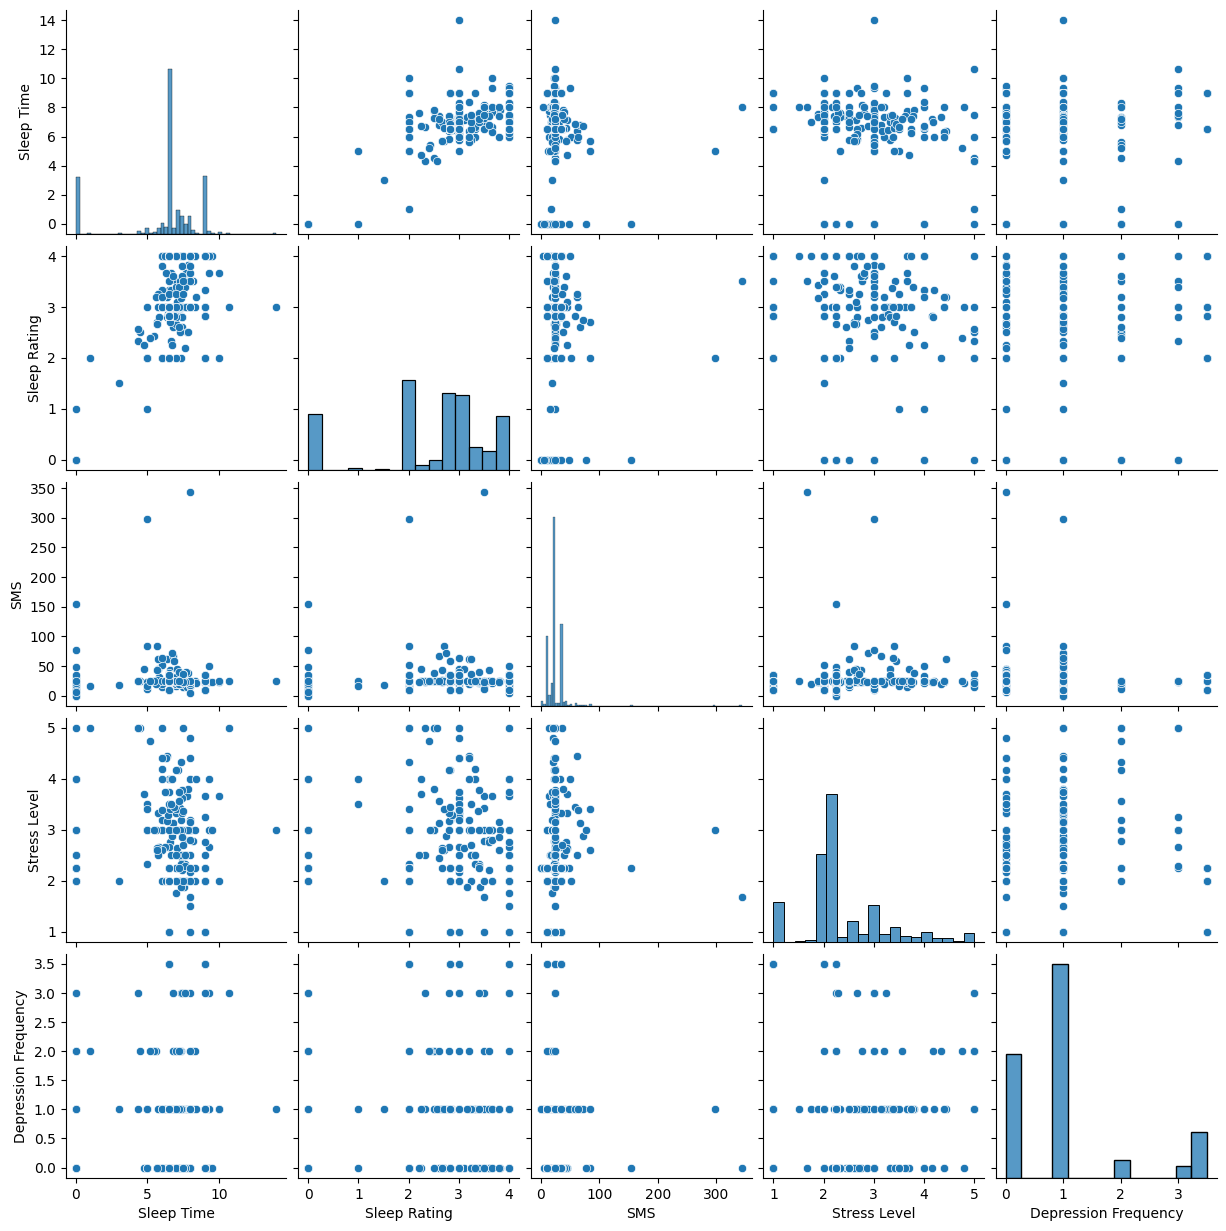

In [60]:
# pairplot for the most important psychological and behavioral variables
sns.pairplot(df[
    ["Sleep Time", "Sleep Rating", "SMS",
     "Stress Level", "Depression Frequency"]
])
plt.show()

Main Observations for EDA:

	•	The dataset was generally clean with minimal missing values.
	•	Some variables showed skewness (typical in behavioral data).
	•	Sleep time and sleep rating showed meaningful variation.
	•	Digital activity features (views, contributions, conversations) had wide ranges, indicating differences in usage habits.
	•	Correlations indicated potential links between academic performance, smartphone usage, and emotional states.

Based on EDA results, the dataset was prepared for modeling by encoding categorical variables, filling missing values, and scaling numerical features.

**Methodology**

Two targets were engineered for the models:

	•	Stress_Class: categorized levels of self-reported stress (1–5 scale → classes).
	•	Depression_Class: categorized frequency of depressive symptoms.
And split the data into train and test sets.

And three machine learning classifiers were applied:

	•	Logistic Regression (baseline linear model)
	•	Decision Tree (non-linear, interpretable)
	•	Random Forest (ensemble, most robust, used for feature importance)

In [61]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [62]:
# Prepare the features
X = df.select_dtypes(include=[np.number]).drop(["Stress Level", "Depression Frequency"], axis=1)

In [63]:
#Convert Stress Level into 3 categories
def convert_stress(x):
    if x < 2.0:
        return 0   # Low Stress
    elif x < 3.0:
        return 1   # Medium Stress
    else:
        return 2   # High Stress

df["Stress_Class"] = df["Stress Level"].apply(convert_stress)

In [64]:
# Preparing for the first goal: Stress Level
y_stress = df["Stress_Class"]

In [65]:
#Convert Depression Frequency into 4 categories
def convert_depression(x):
    if x == 0:
        return 0
    elif x <= 2:
        return 1
    elif x <= 4:
        return 2
    else:
        return 3

df["Depression_Class"] = df["Depression Frequency"].apply(convert_depression)

In [66]:
# Preparing for the second objective: Depression Frequency
y_depr = df["Depression_Class"]

In [67]:
# split the data into train and test sets
X_train, X_test, y_stress_train, y_stress_test = train_test_split(
    X, y_stress, test_size=0.2, random_state=42
)

_, _, y_depr_train, y_depr_test = train_test_split(
    X, y_depr, test_size=0.2, random_state=42
)

In [68]:
# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
# Function to run 3 models
def run_models(X_train, X_test, y_train, y_test, target_name):

    models = {
        "Logistic Regression": LogisticRegression(max_iter=200),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier()
    }

    print(f"\n\n===== RESULTS FOR {target_name} =====\n")

    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        acc = accuracy_score(y_test, preds)
        cm = confusion_matrix(y_test, preds)

        print(f"\n▶ {name}")
        print("Accuracy:", acc)
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", classification_report(y_test, preds))

In [70]:
# Running models on stress level
run_models(X_train_scaled, X_test_scaled, y_stress_train, y_stress_test, "Stress Level")



===== RESULTS FOR Stress Level =====


▶ Logistic Regression
Accuracy: 0.691358024691358
Confusion Matrix:
 [[ 0 10  1]
 [ 0 38  6]
 [ 0  8 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.68      0.86      0.76        44
           2       0.72      0.69      0.71        26

    accuracy                           0.69        81
   macro avg       0.47      0.52      0.49        81
weighted avg       0.60      0.69      0.64        81


▶ Decision Tree
Accuracy: 0.6049382716049383
Confusion Matrix:
 [[ 0  9  2]
 [ 5 32  7]
 [ 2  7 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.67      0.73      0.70        44
           2       0.65      0.65      0.65        26

    accuracy                           0.60        81
   macro avg       0.44      0.46      0.45       

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



▶ Random Forest
Accuracy: 0.6790123456790124
Confusion Matrix:
 [[ 0  9  2]
 [ 0 39  5]
 [ 0 10 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.67      0.89      0.76        44
           2       0.70      0.62      0.65        26

    accuracy                           0.68        81
   macro avg       0.46      0.50      0.47        81
weighted avg       0.59      0.68      0.63        81



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [71]:
# Running models on depression frequency
run_models(X_train_scaled, X_test_scaled, y_depr_train, y_depr_test, "Depression Frequency")



===== RESULTS FOR Depression Frequency =====


▶ Logistic Regression
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[13 12  0]
 [ 3 40  4]
 [ 1  7  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.52      0.62        25
           1       0.68      0.85      0.75        47
           2       0.20      0.11      0.14         9

    accuracy                           0.67        81
   macro avg       0.55      0.49      0.51        81
weighted avg       0.65      0.67      0.64        81


▶ Decision Tree
Accuracy: 0.691358024691358
Confusion Matrix:
 [[17  5  3]
 [ 4 37  6]
 [ 1  6  2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.68      0.72        25
           1       0.77      0.79      0.78        47
           2       0.18      0.22      0.20         9

    accuracy                           0.69        81
   macro avg       0.58      0.56      0.5

**Feature Importance**

The Random Forest model was used to identify the most influential features affecting both Stress and Depression levels.

=== Feature Importance for Stress Level ===


,Feature,Importance
2,Conversation duration,0.066512
28,Views,0.058569
15,Mail,0.056167
27,Days online,0.054403
8,Sleep Rating,0.050671
30,Questions,0.048361
29,Contributions,0.046084
7,Sleep Time,0.039281
34,Comments positivity,0.039190
6,CS65 GPA,0.033997


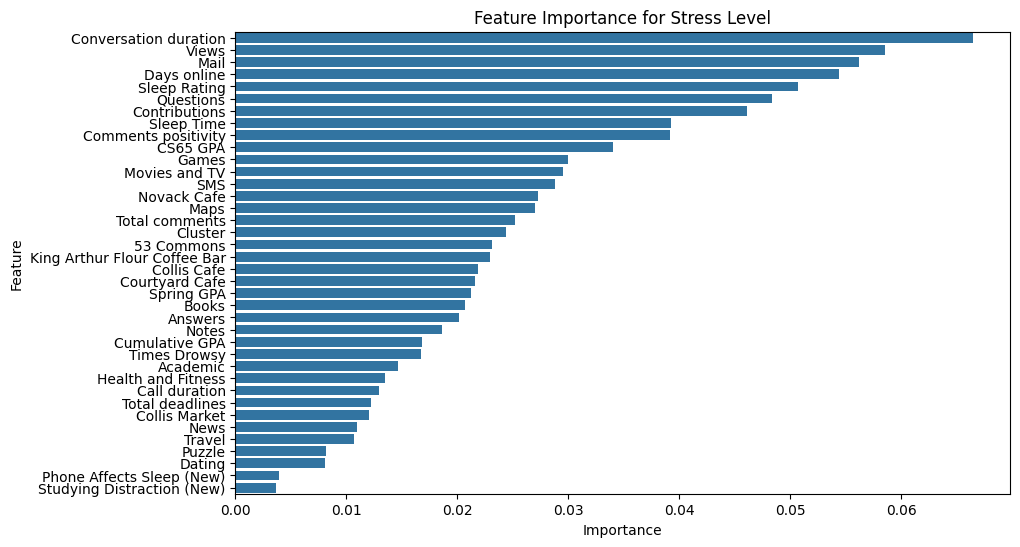

In [72]:
# ===== Feature Importance for Stress =====

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Retrain the model to obtain the feature importance
rf_stress = RandomForestClassifier()
rf_stress.fit(X_train, y_stress_train)

# Extract feature importance
importances_stress = rf_stress.feature_importances_

# Create a table of the columns and their importance
feat_importance_stress = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances_stress
}).sort_values("Importance", ascending=False)

print("=== Feature Importance for Stress Level ===")
display(feat_importance_stress)

# plot the feature importance
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importance_stress)
plt.title("Feature Importance for Stress Level")
plt.show()

**Stress – Top Contributing Features**

The strongest predictors of stress were:

	•	Conversation duration
	•	Views
	•	Mail usage
	•	Days online
	•	Sleep Rating
	•	Sleep Time
These results suggest that higher communication time, increased online activity, and lower sleep quality contribute to elevated stress levels.

=== Feature Importance for Depression Level ===


,Feature,Importance
6,CS65 GPA,0.053632
2,Conversation duration,0.049185
27,Days online,0.048277
34,Comments positivity,0.045026
29,Contributions,0.044910
28,Views,0.044471
17,Movies and TV,0.041454
15,Mail,0.036085
30,Questions,0.035779
13,Games,0.029564


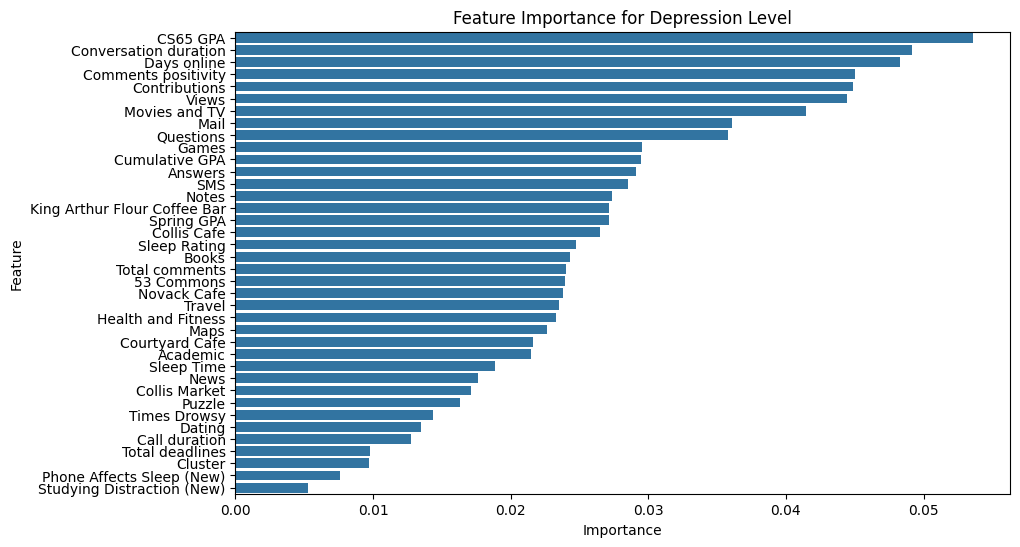

In [73]:
# ===== Feature Importance for Depression =====

rf_depr = RandomForestClassifier()
rf_depr.fit(X_train, y_depr_train)

# Extract feature importance
importances_depr = rf_depr.feature_importances_

# Create a table of the columns and their importance
feat_importance_depr = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances_depr
}).sort_values("Importance", ascending=False)

print("=== Feature Importance for Depression Level ===")
display(feat_importance_depr)

# plot the feature importance
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importance_depr)
plt.title("Feature Importance for Depression Level")
plt.show()

 **Depression – Top Contributing Features**

The most important predictors of depression were:

	•	CS65 GPA
	•	Conversation duration
	•	Days online
	•	Comments positivity
	•	Contributions
	•	Views
These findings indicate that lower academic performance, excessive online activity, and exposure to negative content may increase the likelihood of depressive symptoms.

 **Conclusion**

This project demonstrates that smartphone usage data can be a strong indicator of mental-health patterns. Stress and depression levels were most strongly influenced by communication activity, online engagement, sleep quality, and academic performance. Random Forest provided the most meaningful analysis through feature importance, revealing clear behavioral patterns linked to emotional well-being. The results highlight the value of using digital behavior analytics for early mental-health screening and intervention.

**Recommendations**  

	1.	Improve sleep quality to reduce stress and emotional strain.
	2.	Limit excessive conversation time and online browsing to prevent digital overload.
	3.	Encourage academic support programs to reduce depression influenced by GPA.
	4.	Balance media consumption (movies, TV, games) to avoid negative emotional effects.
	5.	Promote supportive online environments to improve comment positivity and reduce mental distress.
	6.	Develop proactive digital-wellness tools capable of warning users when stress-related patterns appear.